In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as ss

In [135]:
df1 = pd.read_csv("../Data/India Agriculture Crop Production.csv")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345407 entries, 0 to 345406
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   State             345407 non-null  object 
 1   District          345407 non-null  object 
 2   Crop              345375 non-null  object 
 3   Year              345407 non-null  object 
 4   Season            345406 non-null  object 
 5   Area              345374 non-null  float64
 6   Area Units        345407 non-null  object 
 7   Production        340414 non-null  float64
 8   Production Units  345407 non-null  object 
 9   Yield             345374 non-null  float64
dtypes: float64(3), object(7)
memory usage: 26.4+ MB


In [136]:
df1.nunique()

State                   36
District               729
Crop                    56
Year                    24
Season                   6
Area                 48006
Area Units               1
Production           69078
Production Units         3
Yield               197154
dtype: int64

In [137]:
Year = df1["Year"].unique()
print(Year)

['2001-02' '2002-03' '2003-04' '2004-05' '2005-06' '2006-07' '2007-08'
 '2008-09' '2009-10' '2010-11' '2011-12' '2012-13' '2013-14' '2014-15'
 '2015-16' '2016-17' '2017-18' '2018-19' '2019-20' '2020-21' '2000-01'
 '1997-98' '1998-99' '1999-00']


In [138]:
df1["Production Units"].unique()

array(['Tonnes', 'Nuts', 'Bales'], dtype=object)

In [139]:
df1.loc[df1["Production Units"] == "Bales", "Production"] *= 0.24
df1.loc[df1["Production Units"] == "Bales", "Production Units"] = "Tonnes"

In [140]:
df1["Production Units"].unique()

array(['Tonnes', 'Nuts'], dtype=object)

In [141]:
print(df1[df1["Production Units"] == "Nuts"]["Crop"].unique())

['Coconut']


In [142]:
df1.loc[df1["Production Units"] == "Nuts", "Production"] *= (1.44 / 1000)
df1.loc[df1["Production Units"] == "Nuts", "Production Units"] = "Tonnes"

In [143]:
df1["Production Units"].unique()

array(['Tonnes'], dtype=object)

In [144]:
df1["Yield"] = df1["Production"] / df1["Area"]

In [145]:
df1 = df1.drop(["Area Units", "Production Units", "Yield"],axis=1)
df1.nunique()

State            36
District        729
Crop             56
Year             24
Season            6
Area          48006
Production    72111
dtype: int64

In [146]:
def convert_year_to_numeric(year):
    return int(year.split('-')[0])
df1["Year"] = df1["Year"].apply(convert_year_to_numeric)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345407 entries, 0 to 345406
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   State       345407 non-null  object 
 1   District    345407 non-null  object 
 2   Crop        345375 non-null  object 
 3   Year        345407 non-null  int64  
 4   Season      345406 non-null  object 
 5   Area        345374 non-null  float64
 6   Production  340414 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 18.4+ MB


<Axes: xlabel='Year', ylabel='Production'>

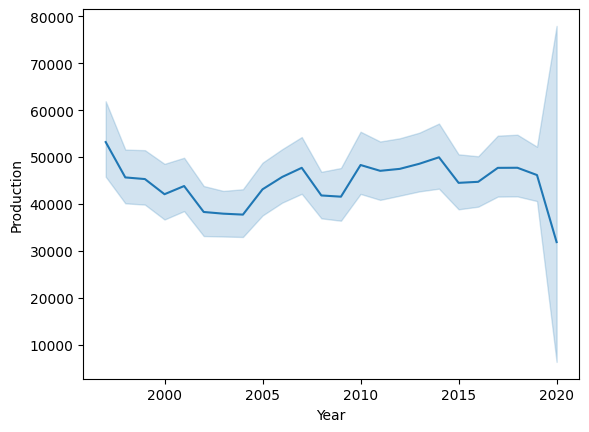

In [147]:
sns.lineplot(data=df1, x='Year',y='Production')

In [148]:
df = df1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345407 entries, 0 to 345406
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   State       345407 non-null  object 
 1   District    345407 non-null  object 
 2   Crop        345375 non-null  object 
 3   Year        345407 non-null  int64  
 4   Season      345406 non-null  object 
 5   Area        345374 non-null  float64
 6   Production  340414 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 18.4+ MB


In [149]:
from scipy.stats.mstats import winsorize

def outlier_info(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_count = outliers.shape[0]
    total_count = df.shape[0]
    outlier_percentage = (outlier_count / total_count) * 100

    return outlier_count, outlier_percentage

def outlier_remover(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df.loc[df[column] < lower_bound, column] = lower_bound
    df.loc[df[column] > upper_bound, column] = upper_bound
    return df

def outlier_remover_win(df, column, limits=(0.05, 0.05)):
    data = df[column]
    winsorized_data = winsorize(data, limits=limits)
    df[column] = winsorized_data
    return df

In [150]:
df = outlier_remover_win(df,"Area")
df = outlier_remover(df,"Area")
df = outlier_remover_win(df,"Production")
df = outlier_remover(df,"Production")

c:\Users\shyam\OneDrive\Desktop\DL_prac\PyTorch_Tut\.myenv\lib\site-packages\numpy\lib\function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\shyam\OneDrive\Desktop\DL_prac\PyTorch_Tut\.myenv\lib\site-packages\numpy\lib\function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\shyam\OneDrive\Desktop\DL_prac\PyTorch_Tut\.myenv\lib\site-packages\numpy\lib\function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\shyam\OneDrive\Desktop\DL_prac\PyTorch_Tut\.myenv\lib\site-packages\numpy\lib\function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


(0, 0.0)


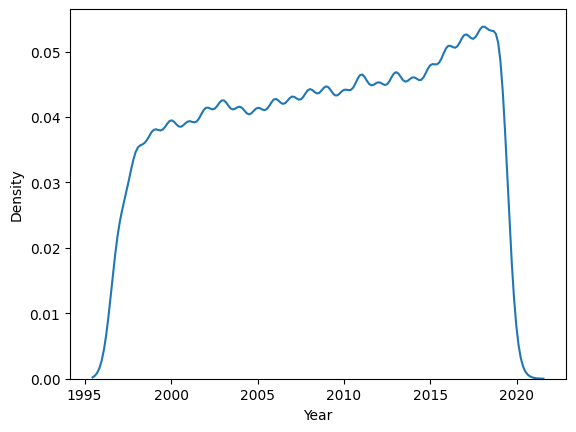

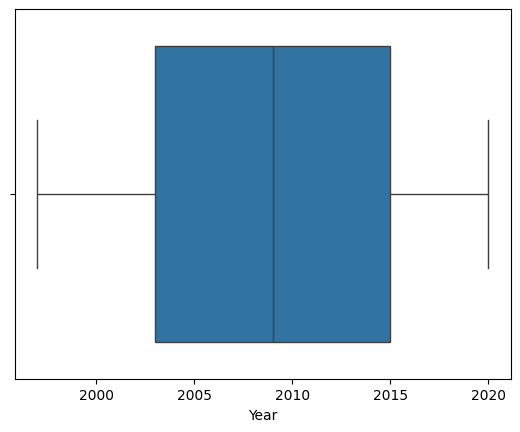

c:\Users\shyam\OneDrive\Desktop\DL_prac\PyTorch_Tut\.myenv\lib\site-packages\numpy\lib\function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\shyam\OneDrive\Desktop\DL_prac\PyTorch_Tut\.myenv\lib\site-packages\numpy\lib\function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


(0, 0.0)


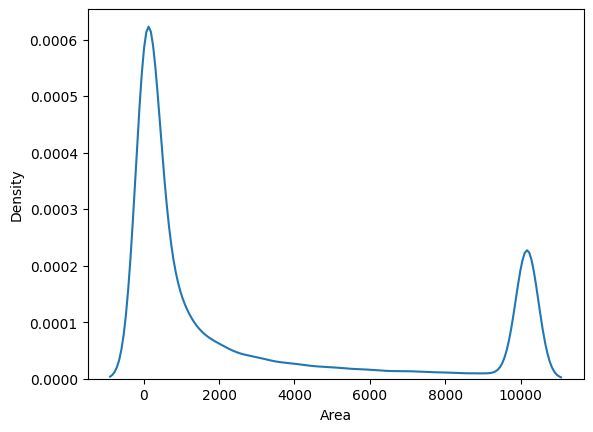

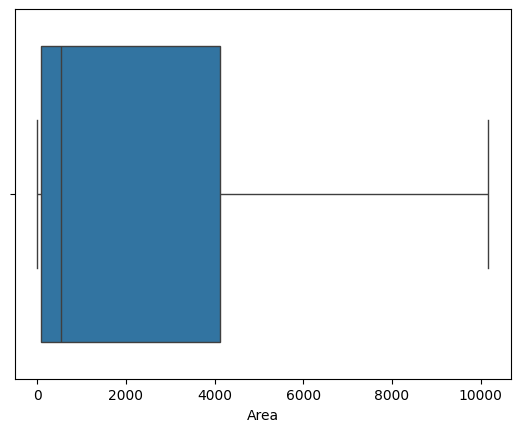

c:\Users\shyam\OneDrive\Desktop\DL_prac\PyTorch_Tut\.myenv\lib\site-packages\numpy\lib\function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\shyam\OneDrive\Desktop\DL_prac\PyTorch_Tut\.myenv\lib\site-packages\numpy\lib\function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


(0, 0.0)


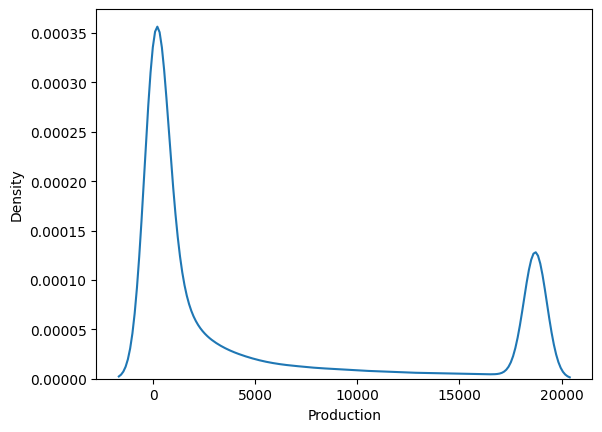

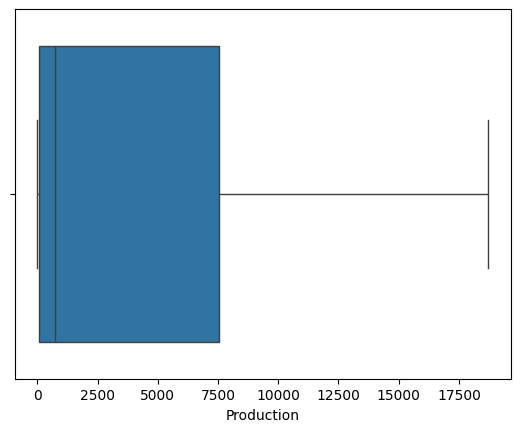

In [151]:
for i in ["Year","Area","Production"]:
    print(outlier_info(df,i))
    sns.kdeplot(data=df,x=i)
    plt.show()
    sns.boxplot(data=df,x=i)
    plt.show()

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345407 entries, 0 to 345406
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   State       345407 non-null  object 
 1   District    345407 non-null  object 
 2   Crop        345375 non-null  object 
 3   Year        345407 non-null  int64  
 4   Season      345406 non-null  object 
 5   Area        345407 non-null  float64
 6   Production  345407 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 18.4+ MB


In [153]:
df.dropna(inplace=True)

In [154]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,StandardScaler
import torch

label_encoders = {}
for column in ['State', 'District', 'Crop', 'Season']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Feature scaling
scalers = {}
for column in ['Area', 'Production', 'Year']:
    scaler = StandardScaler()
    df[column] = scaler.fit_transform(df[[column]])
    scalers[column] = scaler


df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 345374 entries, 0 to 345374
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   State       345374 non-null  int32  
 1   District    345374 non-null  int32  
 2   Crop        345374 non-null  int32  
 3   Year        345374 non-null  float64
 4   Season      345374 non-null  int32  
 5   Area        345374 non-null  float64
 6   Production  345374 non-null  float64
dtypes: float64(3), int32(4)
memory usage: 15.8 MB


In [155]:
from sklearn.model_selection import train_test_split


def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data)-seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length][-1]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys).reshape(-1, 1)

seq_length = 10
features = ['State', 'District', 'Crop', 'Year', 'Season', 'Area']
target = 'Production'

data = df[features + [target]].values
X, y = create_sequences(data, seq_length)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

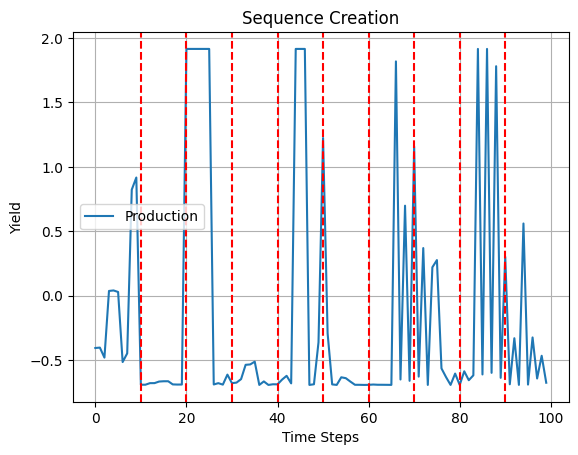

In [156]:
sequence_length = 10
production_values = df[target].values[:100]

plt.plot(production_values, label=target)
for i in range(0, len(production_values) - sequence_length, sequence_length):
    plt.axvline(i + sequence_length, color='r', linestyle='--')

plt.title('Sequence Creation')
plt.xlabel('Time Steps')
plt.ylabel('Yield')
plt.legend()
plt.grid()
plt.show()

In [157]:
import torch
from torch.utils.data import Dataset, DataLoader

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return torch.tensor(self.X[idx], dtype=torch.float32).to(device), torch.tensor(self.y[idx], dtype=torch.float32).to(device)


Using device: cuda


In [158]:
train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [159]:
import torch.nn as nn
class Model(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers=1):
        super(Model, self).__init__()
        self.name = "Bi-GRU"
        self.hidden_size = hidden_dim
        self.num_layers = num_layers
        self.gru = nn.GRU(input_dim, hidden_dim, num_layers, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_dim * 2, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.gru(x, h0)
        out = self.fc(out[:, -1, :])
        return out

In [160]:
import torch.optim as optim
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,explained_variance_score

In [161]:
def train_model(model, train_loader, test_loader, num_epochs=10, learning_rate=0.001):
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    
    train_losses = []
    test_losses = []
    r2_scores = []
    mse_errors = []
    mae_errors = []
    ev_scores = []

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for X_batch, y_batch in train_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)  # Adjust target shape
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        train_loss /= len(train_loader)
        train_losses.append(train_loss)

        model.eval()
        test_loss = 0.0
        y_test_all = []
        test_outputs_all = []
        with torch.no_grad():
            for X_batch, y_batch in test_loader:
                test_outputs = model(X_batch)
                loss = criterion(test_outputs, y_batch)  # Adjust target shape
                test_loss += loss.item()
                
                y_test_all.append(y_batch.cpu().numpy())
                test_outputs_all.append(test_outputs.cpu().numpy())

        test_loss /= len(test_loader)
        test_losses.append(test_loss)

        y_test_all = np.concatenate(y_test_all)
        test_outputs_all = np.concatenate(test_outputs_all)
        
        r2 = r2_score(y_test_all, test_outputs_all)
        mse = mean_squared_error(y_test_all, test_outputs_all)
        mae = mean_absolute_error(y_test_all, test_outputs_all)
        evs = explained_variance_score(y_test_all, test_outputs_all)
        
        r2_scores.append(r2)
        mse_errors.append(mse)
        mae_errors.append(mae)
        ev_scores.append(evs)
        
        
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, R2 Score: {r2:.4f}, MSE Score: {mse:.4f}, MAE Score: {mae:.4f}, EVS Score: {evs:.4f}')

    # Plotting training and test loss
    plt.figure(figsize=(12, 6))
    plt.plot(range(num_epochs), train_losses, label='Train Loss')
    plt.plot(range(num_epochs), test_losses, label='Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Test Loss')
    plt.legend()
    plt.grid()
    plt.savefig(f"../Results/{model.name}_{model.num_layers}_loss.png")
    plt.show()

    # Plotting R-squared score
    plt.figure(figsize=(12, 6))
    plt.plot(range(num_epochs), r2_scores, label='R2 Score')
    plt.xlabel('Epochs')
    plt.ylabel('R2 Score')
    plt.title('R2 Score over Epochs')
    plt.legend()
    plt.grid()
    plt.savefig(f"../Results/{model.name}_{model.num_layers}_r2.png")
    plt.show()
    
    plt.figure(figsize=(12, 6))
    plt.plot(range(num_epochs), ev_scores, label='EV Score')
    plt.xlabel('Epochs')
    plt.ylabel('EV Score')
    plt.title('EV Score over Epochs')
    plt.legend()
    plt.grid()
    plt.savefig(f"../Results/{model.name}_{model.num_layers}_ev.png")
    plt.show()
    
    plt.figure(figsize=(12, 6))
    plt.plot(range(num_epochs), mse_errors, label='MSE')
    plt.xlabel('Epochs')
    plt.ylabel('MSE Score')
    plt.title('MSE Score over Epochs')
    plt.legend()
    plt.grid()
    plt.savefig(f"../Results/{model.name}_{model.num_layers}_mse.png")
    plt.show()
    
    plt.figure(figsize=(12, 6))
    plt.plot(range(num_epochs), mae_errors, label='MAE')
    plt.xlabel('Epochs')
    plt.ylabel('MAE Score')
    plt.title('MAE Score over Epochs')
    plt.legend()
    plt.grid()
    plt.savefig(f"../Results/{model.name}_{model.num_layers}_mae.png")
    plt.show()
    
    plt.figure(figsize=(12, 6))
    plt.plot(y_test_all, label='Actual')
    plt.plot(test_outputs_all, label='Predicted')
    plt.title("Predictions")
    plt.xlabel('Time Step')
    plt.ylabel('Production')
    plt.legend()
    plt.grid()
    plt.savefig(f"../Results/{model.name}_{model.num_layers}_pred.png")
    plt.show()

Epoch [1/15], Train Loss: 0.5081, Test Loss: 0.4852, R2 Score: 0.5141, MSE Score: 0.4853, MAE Score: 0.4740, EVS Score: 0.5167
Epoch [2/15], Train Loss: 0.4883, Test Loss: 0.4989, R2 Score: 0.5004, MSE Score: 0.4990, MAE Score: 0.5147, EVS Score: 0.5197
Epoch [3/15], Train Loss: 0.4854, Test Loss: 0.4840, R2 Score: 0.5153, MSE Score: 0.4841, MAE Score: 0.4828, EVS Score: 0.5194
Epoch [4/15], Train Loss: 0.4815, Test Loss: 0.4807, R2 Score: 0.5186, MSE Score: 0.4807, MAE Score: 0.4457, EVS Score: 0.5189
Epoch [5/15], Train Loss: 0.4780, Test Loss: 0.4707, R2 Score: 0.5286, MSE Score: 0.4708, MAE Score: 0.4489, EVS Score: 0.5286
Epoch [6/15], Train Loss: 0.4756, Test Loss: 0.4758, R2 Score: 0.5235, MSE Score: 0.4759, MAE Score: 0.4693, EVS Score: 0.5265
Epoch [7/15], Train Loss: 0.4750, Test Loss: 0.4668, R2 Score: 0.5326, MSE Score: 0.4669, MAE Score: 0.4364, EVS Score: 0.5328
Epoch [8/15], Train Loss: 0.4747, Test Loss: 0.5251, R2 Score: 0.4742, MSE Score: 0.5251, MAE Score: 0.4313, EV

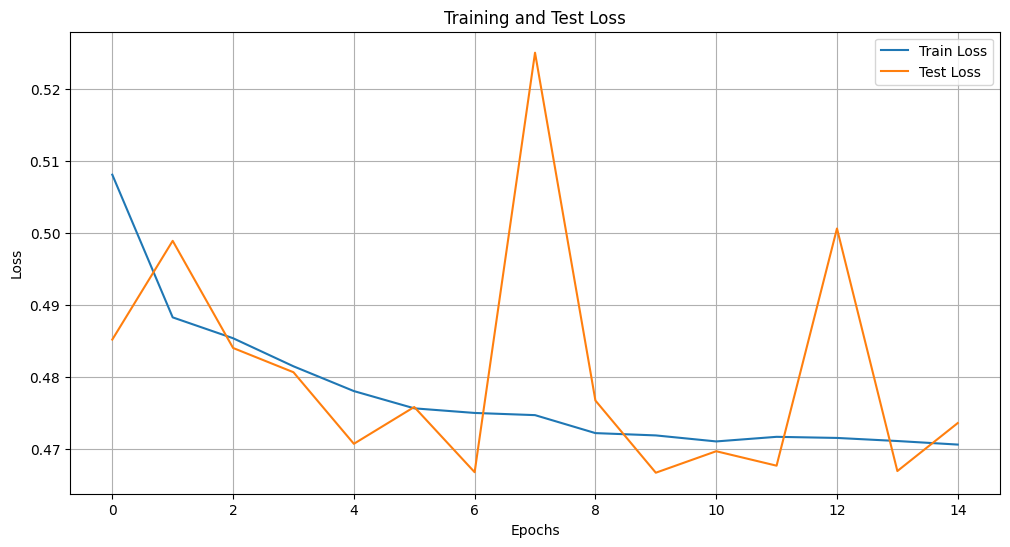

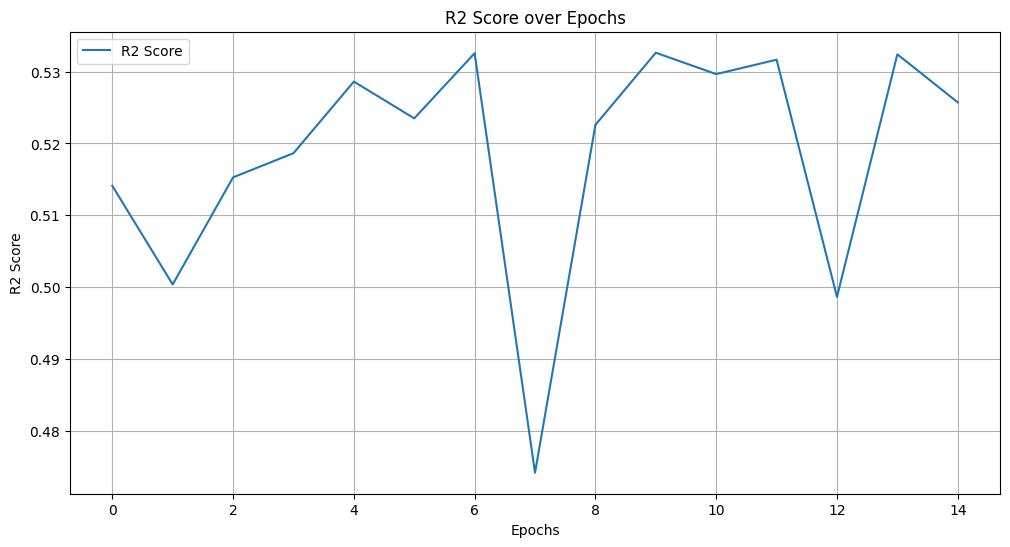

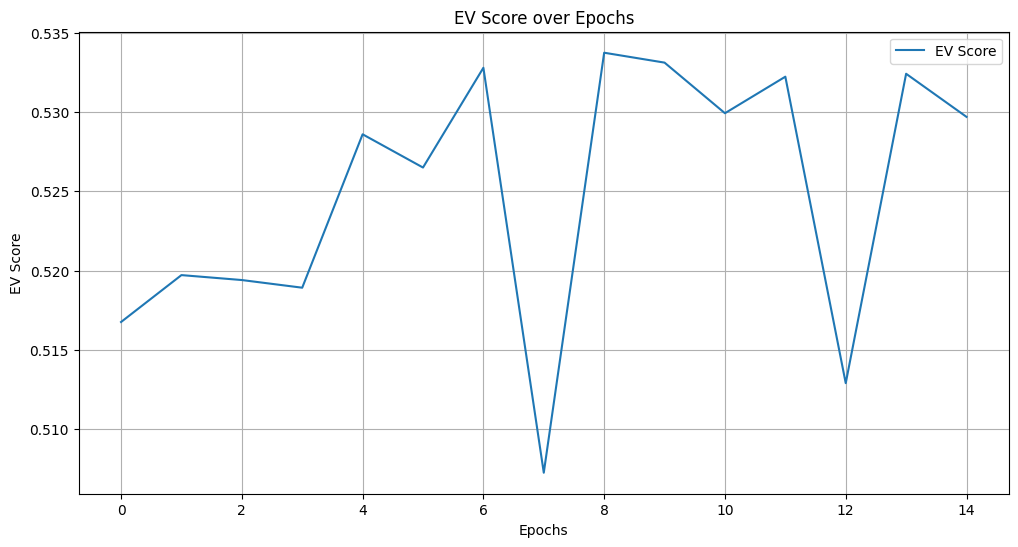

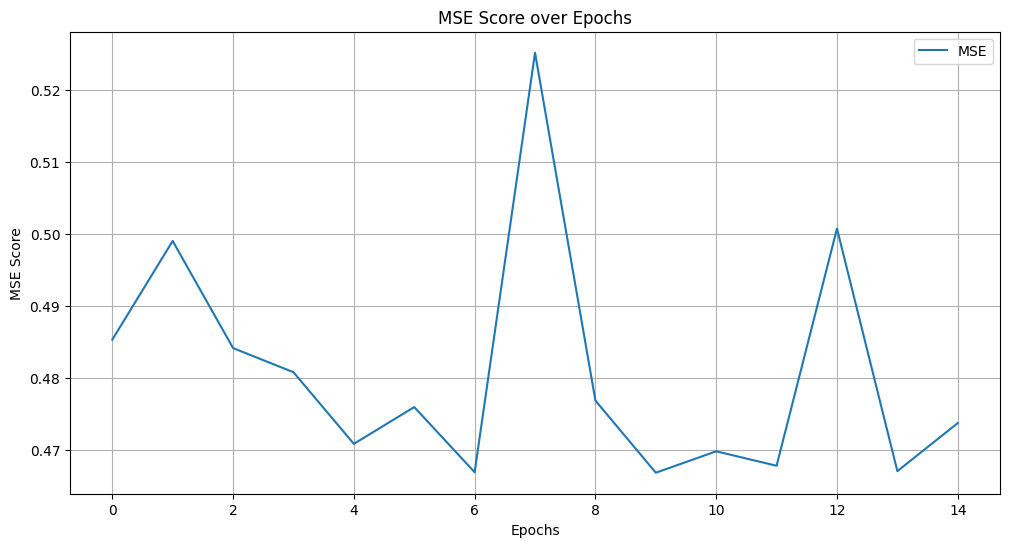

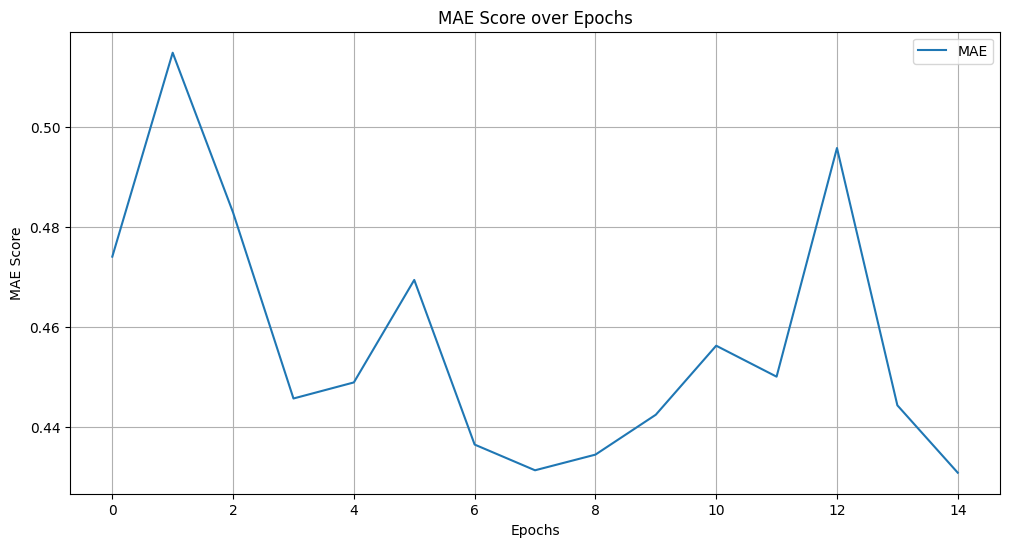

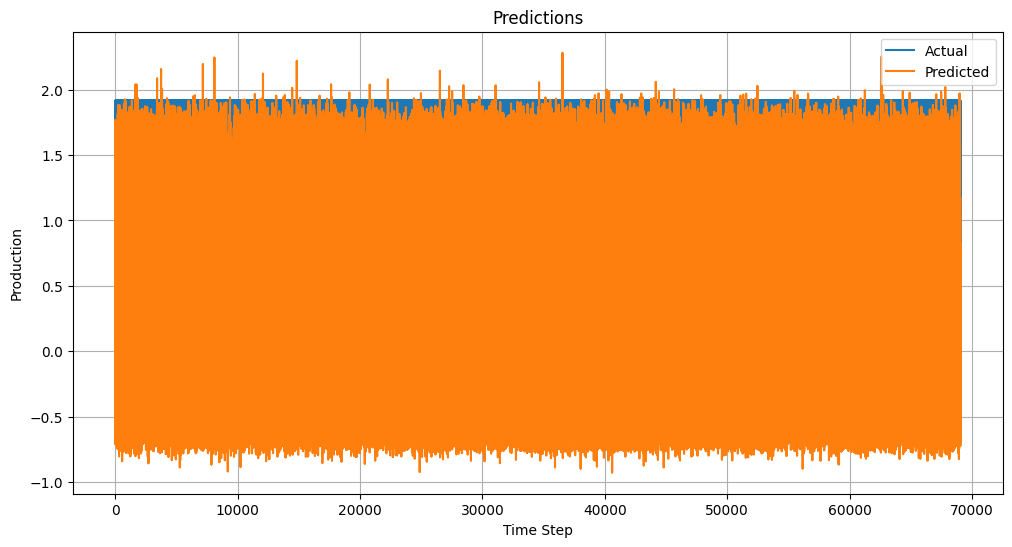

In [162]:
input_dim = X_train.shape[2]
hidden_dim = 50
output_dim = 1
num_layers = 1
model = Model(input_dim, hidden_dim, output_dim, num_layers).to(device)
train_model(model, train_loader, test_loader, num_epochs=15)

Epoch [1/15], Train Loss: 0.4809, Test Loss: 0.4539, R2 Score: 0.5454, MSE Score: 0.4540, MAE Score: 0.4174, EVS Score: 0.5514
Epoch [2/15], Train Loss: 0.4416, Test Loss: 0.4390, R2 Score: 0.5604, MSE Score: 0.4391, MAE Score: 0.3902, EVS Score: 0.5610
Epoch [3/15], Train Loss: 0.4335, Test Loss: 0.4374, R2 Score: 0.5620, MSE Score: 0.4374, MAE Score: 0.4190, EVS Score: 0.5621
Epoch [4/15], Train Loss: 0.4259, Test Loss: 0.4271, R2 Score: 0.5723, MSE Score: 0.4272, MAE Score: 0.4054, EVS Score: 0.5733
Epoch [5/15], Train Loss: 0.4236, Test Loss: 0.4276, R2 Score: 0.5718, MSE Score: 0.4277, MAE Score: 0.4358, EVS Score: 0.5728
Epoch [6/15], Train Loss: 0.4205, Test Loss: 0.4188, R2 Score: 0.5806, MSE Score: 0.4189, MAE Score: 0.4167, EVS Score: 0.5810
Epoch [7/15], Train Loss: 0.4181, Test Loss: 0.4215, R2 Score: 0.5779, MSE Score: 0.4216, MAE Score: 0.4145, EVS Score: 0.5780
Epoch [8/15], Train Loss: 0.4164, Test Loss: 0.4162, R2 Score: 0.5832, MSE Score: 0.4163, MAE Score: 0.3900, EV

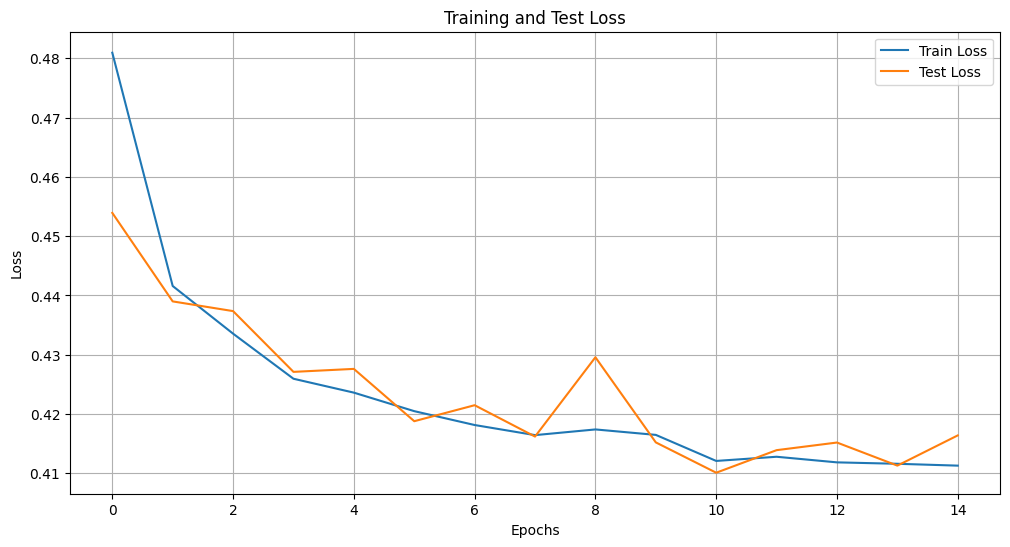

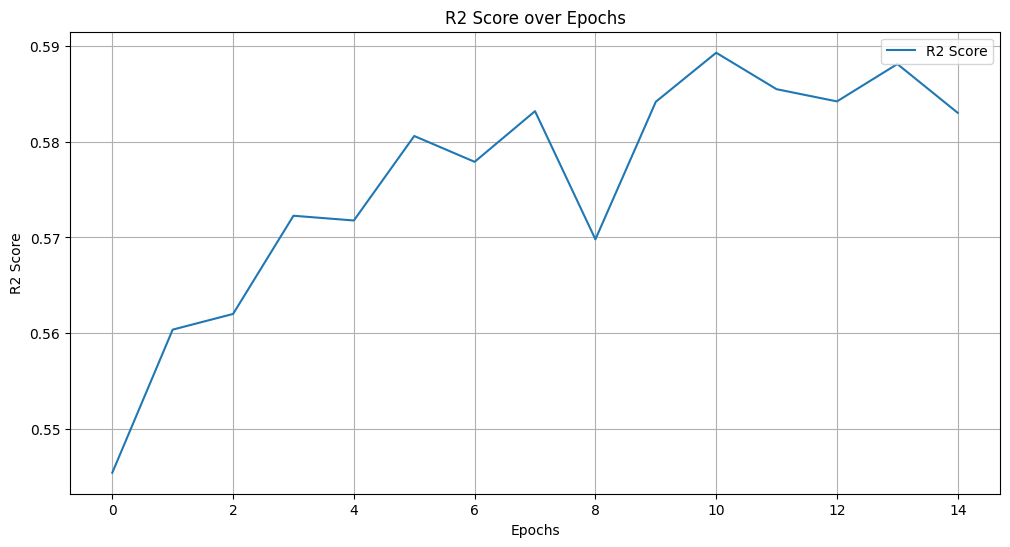

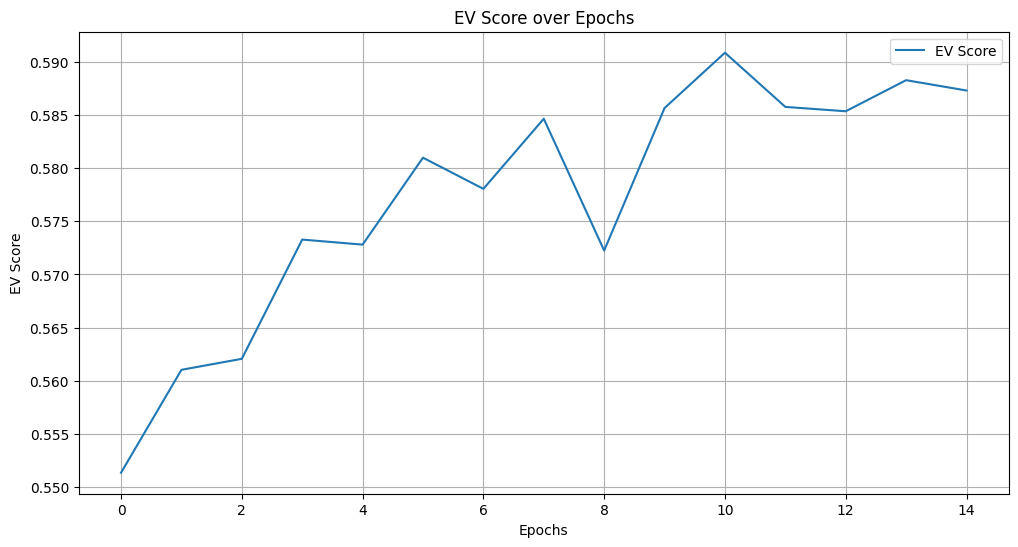

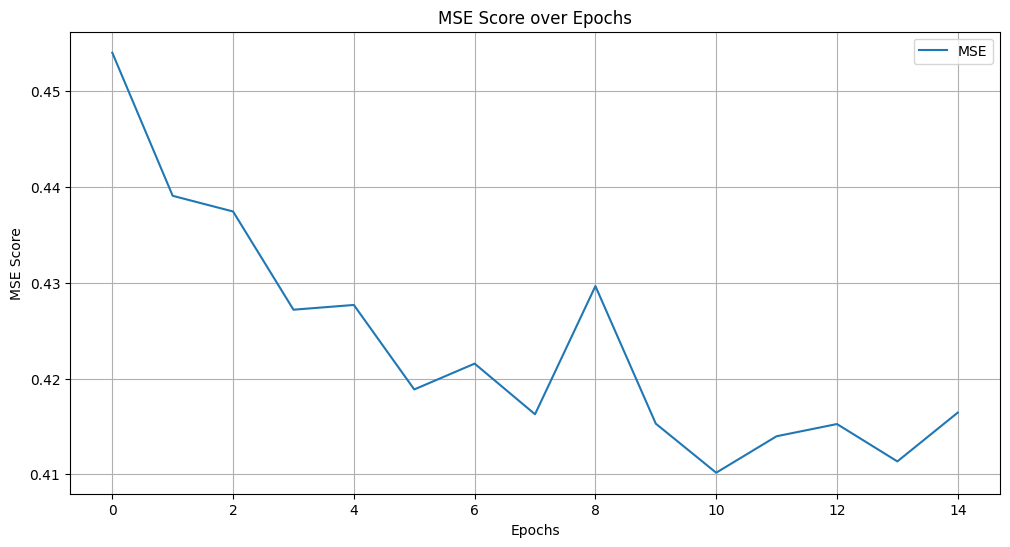

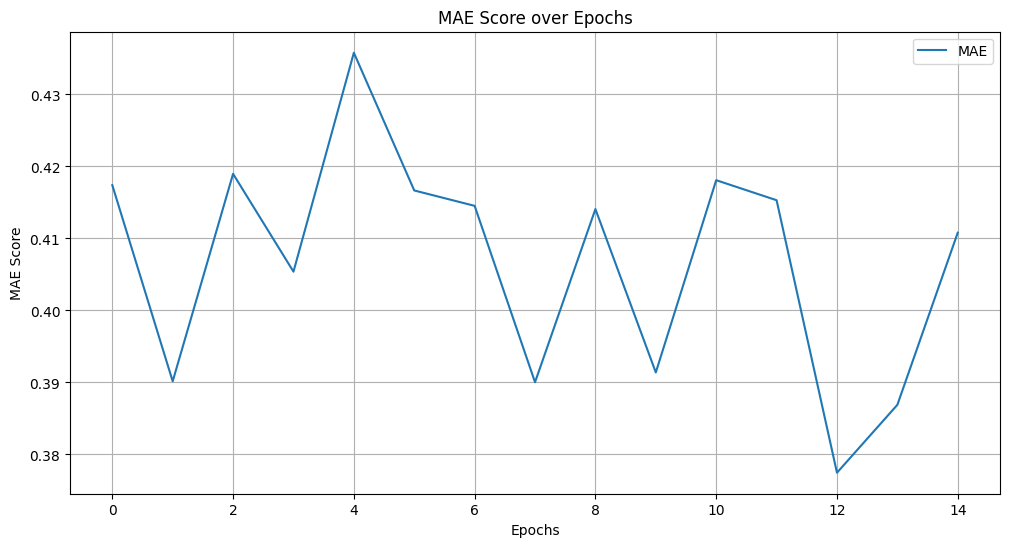

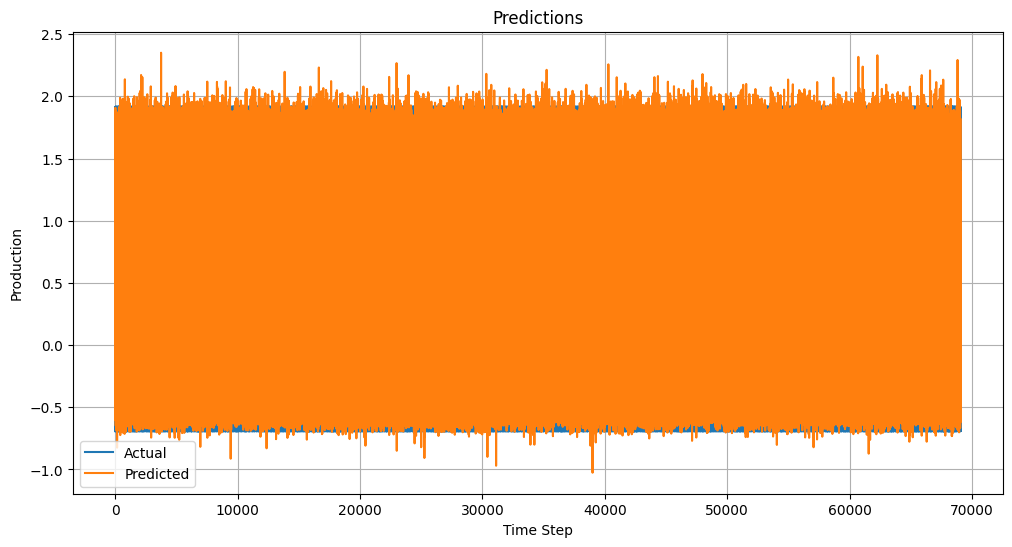

In [163]:
input_dim = X_train.shape[2]
hidden_dim = 50
output_dim = 1
num_layers = 2
model = Model(input_dim, hidden_dim, output_dim, num_layers).to(device)
train_model(model, train_loader, test_loader, num_epochs=15)

Epoch [1/15], Train Loss: 0.4758, Test Loss: 0.4614, R2 Score: 0.5379, MSE Score: 0.4615, MAE Score: 0.3981, EVS Score: 0.5606
Epoch [2/15], Train Loss: 0.4361, Test Loss: 0.4262, R2 Score: 0.5731, MSE Score: 0.4263, MAE Score: 0.4101, EVS Score: 0.5734
Epoch [3/15], Train Loss: 0.4294, Test Loss: 0.4306, R2 Score: 0.5688, MSE Score: 0.4307, MAE Score: 0.4140, EVS Score: 0.5689
Epoch [4/15], Train Loss: 0.4248, Test Loss: 0.4292, R2 Score: 0.5702, MSE Score: 0.4293, MAE Score: 0.4214, EVS Score: 0.5702
Epoch [5/15], Train Loss: 0.4210, Test Loss: 0.4245, R2 Score: 0.5749, MSE Score: 0.4246, MAE Score: 0.4127, EVS Score: 0.5761
Epoch [6/15], Train Loss: 0.4198, Test Loss: 0.4166, R2 Score: 0.5828, MSE Score: 0.4167, MAE Score: 0.3988, EVS Score: 0.5828
Epoch [7/15], Train Loss: 0.4200, Test Loss: 0.4337, R2 Score: 0.5657, MSE Score: 0.4338, MAE Score: 0.4151, EVS Score: 0.5691
Epoch [8/15], Train Loss: 0.4175, Test Loss: 0.4185, R2 Score: 0.5809, MSE Score: 0.4186, MAE Score: 0.4210, EV

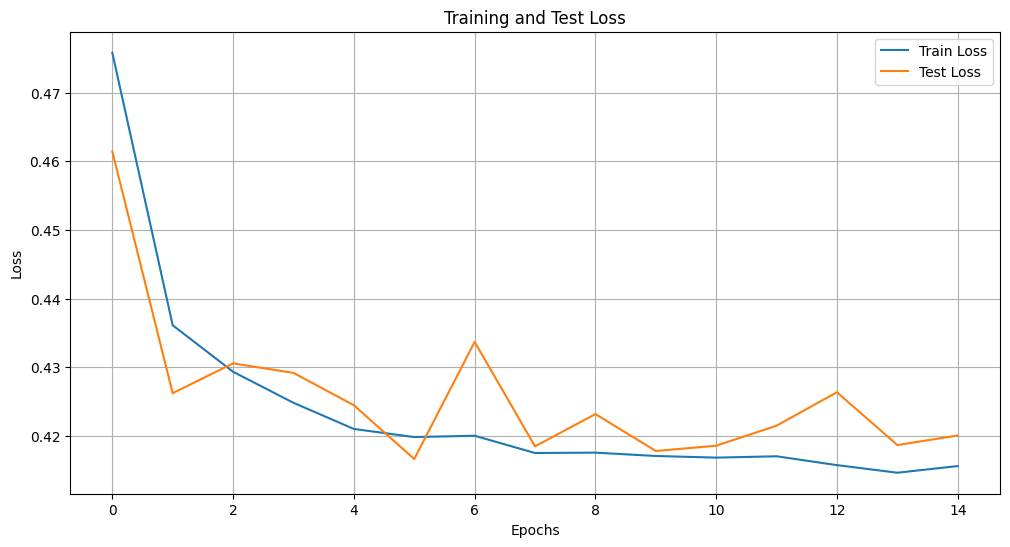

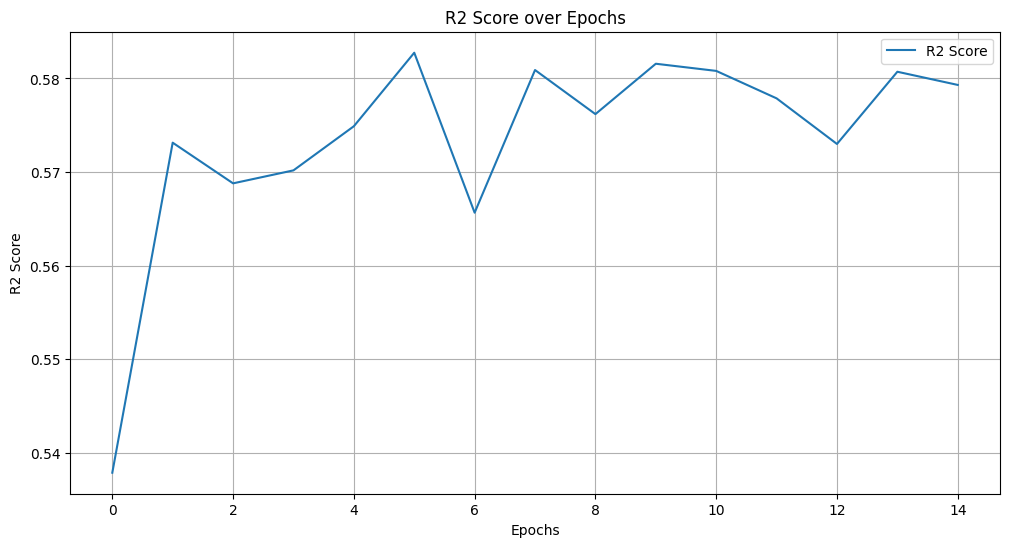

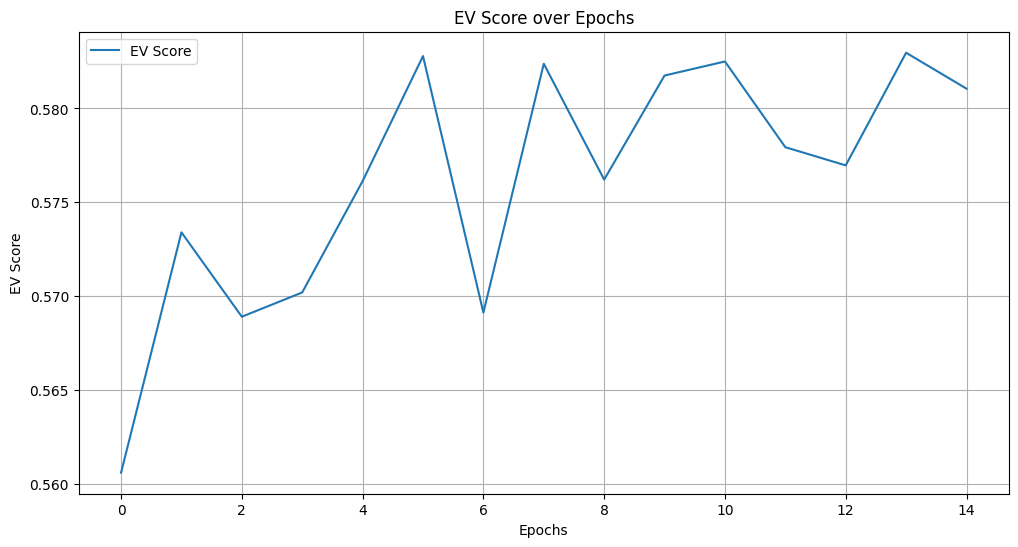

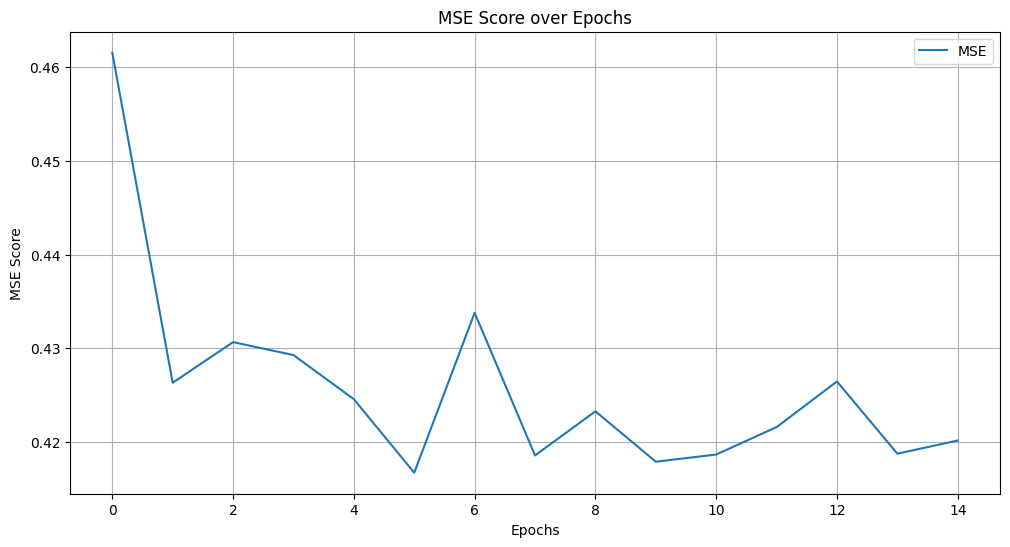

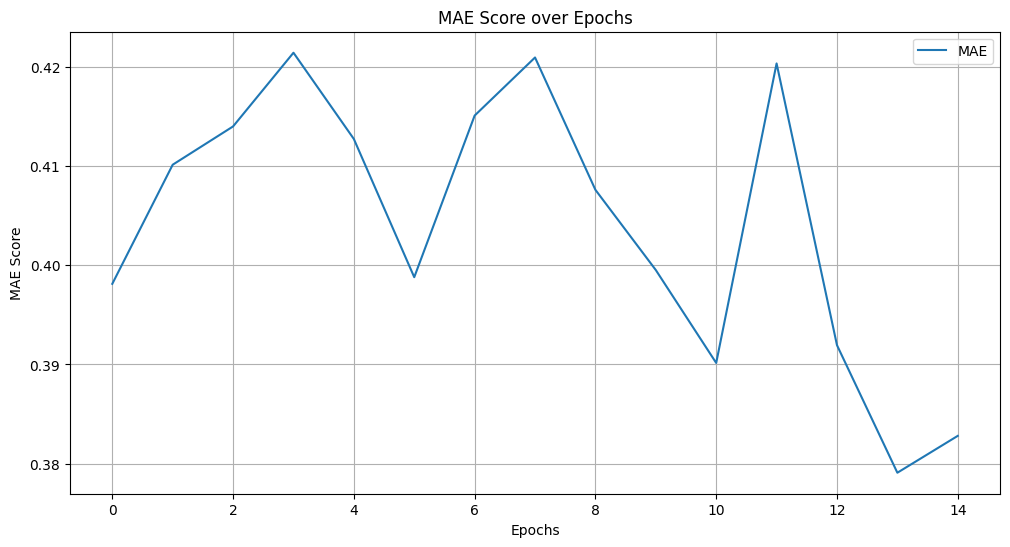

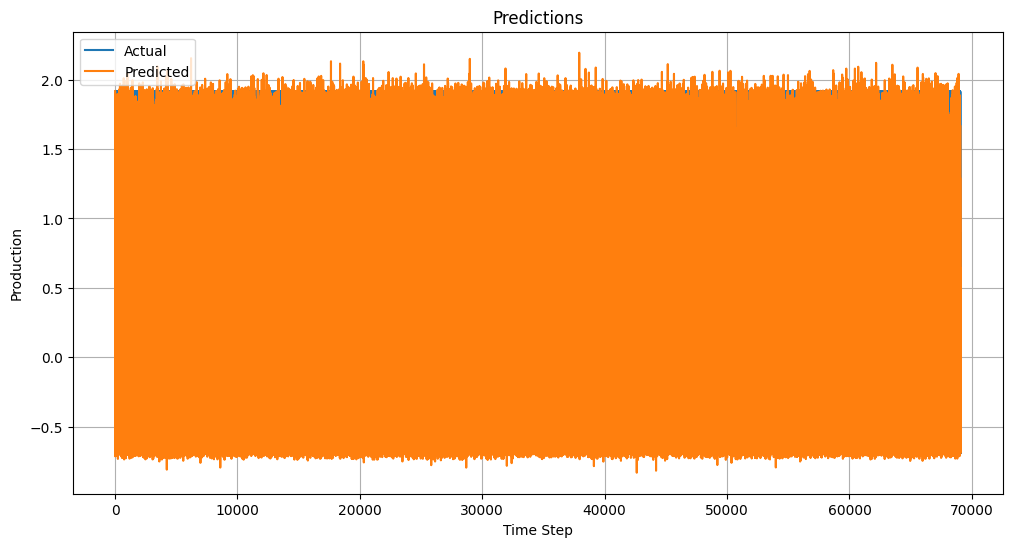

In [164]:
input_dim = X_train.shape[2]
hidden_dim = 50
output_dim = 1
num_layers = 3
model = Model(input_dim, hidden_dim, output_dim, num_layers).to(device)
train_model(model, train_loader, test_loader, num_epochs=15)